## Objectives 
Data set: Australian Ethical Investment Limited (AEF) - 2023 June and 2024 June <br />
- To understand the yearly performance
- To display the quarterly performance
- To identify the trading patterns (the avg price high, low, open, close) <br />
- What is the trading pattern 
- What is the good price to invest

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import re 
import matplotlib.pyplot as plt
import seaborn as sns  
df = pd.read_csv('/AEF.AX.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-30,3.38,3.39,3.21,3.36,3.303808,235928
1,2023-07-03,3.38,3.38,3.27,3.30,3.244812,126489
2,2023-07-04,3.27,3.48,3.24,3.44,3.382470,202702
3,2023-07-05,3.44,3.46,3.31,3.37,3.313641,171352
4,2023-07-06,3.34,3.35,3.16,3.20,3.146484,95553


In [15]:
print(df.shape)

(253, 7)


In [18]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,4.562292,4.661443,4.468715,4.581542,4.555399,127893.316206
std,0.539508,0.548082,0.532818,0.540742,0.549048,71092.799279
min,3.110000,3.200000,3.090000,3.150000,3.097320,13299.000000
25%,4.220000,4.300000,4.110000,4.250000,4.225049,79895.000000
50%,4.580000,4.680000,4.460000,4.600000,4.592877,110475.000000
75%,4.950000,5.010000,4.830000,4.950000,4.930000,163375.000000
max,5.750000,5.780000,5.510000,5.700000,5.666536,533808.000000


## Check if data require cleaning 

In [22]:
## check data type and other info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [27]:
##check any na value 
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [29]:
## check any null value 
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [32]:
##check if data is duplicated

df.duplicated().sum()

0

## check if the date formate consistant 


In [37]:
## Ensure every date follows the same pd date time formate 
df['Date'] = pd.to_datetime(df['Date'])

## Buidling plots 

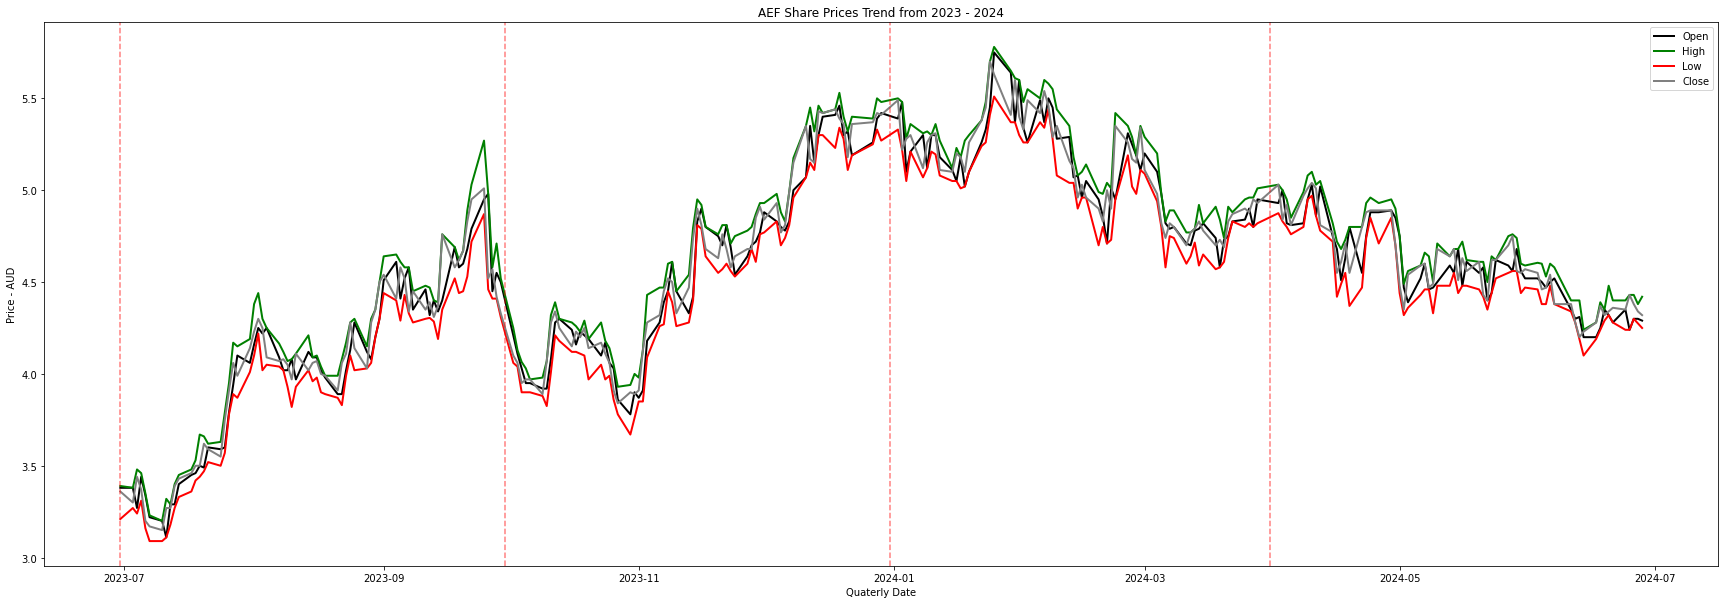

In [42]:
## Use Line chart to shows trading perfomance
## Open	High Low Close price
plt.figure(figsize=(30, 10))
plt.plot(df['Date'], df['Open'], marker='', linestyle='-', color='black', linewidth=2, label='Open')
plt.plot(df['Date'], df['High'], marker='', color='green', linewidth=2, label='High')
plt.plot(df['Date'], df['Low'], marker='', color='red', linewidth=2, label='Low')
plt.plot(df['Date'], df['Close'], marker='', linestyle='-', color='gray', linewidth=2, label='Close')


# Add vertical line to devide quater 
for quarter in pd.date_range(start=df['Date'].iloc[0], end=df['Date'].iloc[-1], freq='Q'):
    plt.axvline(x=quarter , color='r', linestyle='--', alpha=0.5)

# Add labels and title
plt.title('AEF Share Prices Trend from 2023 - 2024')
plt.xlabel('Quaterly Date')
plt.ylabel('Price - AUD')
plt.legend()

# Show plot
plt.show()

## Insights 
1. The "Close" (grey line) and "Open" (black line) prices are lower than the "High" (green line) price, indicating that stock fluctuation only occurs during market opening hours. Consequently, the highest and lowest prices only occur during trading hours.
<br />
2. The "Close" (grey line) is always above the "Low" (red line), meaning that the closing price is consistently higher than the lowest price of the day.
<br />
3. Overall, the price performed steadily throughout the year, with gradual increases in Q1, mid-Q2, and Q3. However, there was a spike and decline towards the end of Q1 and the beginning of Q2, followed by a recovery from mid-Q2. It might be worth understanding the specific events or news that had an impact on these fluctuations.
<br />

**Ideas:** <br />
Referring to insights 1 and 2:
- To optimize a trading strategy, especially for day traders, it might be ideal for them to conduct transactions within trading hours to maximize their gains.
- To minimize their losses for the day, it might be a good idea to sell their shares just before the closing hours, as the closing price tends to bounce back and be higher than the lowest price of the day.
- It might also be ideal to buy shares just before the opening hour, as the most significant price changes occur during the trading hour, resulting in the highest rates.
- For regular investments, it might be ideal to understand the average pricing, average high and low, and quarterly performance (covered in the next insight, so stay tuned).

**Note & questions:**
- Are there specific daily patterns, and if so, are there particular hours when the price tends to drop? (I require hourly trading data for this analysis). 
- It would also be beneficial to compare the open price and close price by adding a column to show the daily results ("Close" - "Open").
  
_The above information is provided for personal discovery and is not intended as financial advice._

## Quarterly performance / average pricing 

In [50]:
## To show yearly meidan pricing (Open, High, Low, Close)
df.quantile([0.25, 0.5, 0.75])

,Open,High,Low,Close,Adj Close,Volume
0.25,4.22,4.30,4.11,4.25,4.225049,79895.0
0.50,4.58,4.68,4.46,4.60,4.592877,110475.0
0.75,4.95,5.01,4.83,4.95,4.930000,163375.0


In [55]:
## Set quartile as column to dataset  

df['Quartile'] = pd.qcut(df['Date'],  q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quartile
0,2023-06-30,3.38,3.39,3.21,3.36,3.303808,235928,Q1
1,2023-07-03,3.38,3.38,3.27,3.30,3.244812,126489,Q1
2,2023-07-04,3.27,3.48,3.24,3.44,3.382470,202702,Q1
3,2023-07-05,3.44,3.46,3.31,3.37,3.313641,171352,Q1
4,2023-07-06,3.34,3.35,3.16,3.20,3.146484,95553,Q1


In [58]:
## To get the volume of each quartile
volume_df = df.groupby('Quartile')['Volume'].sum()
volume_df

Quartile
Q1    10689164
Q2     9038441
Q3     6315583
Q4     6313821
Name: Volume, dtype: int64

In [61]:
## To get the quaitie pricing for Q1 - Q4

## Create an empty list to store all Quartile
quantiles = []

## Use for loop to get quaitle pricing 
for quartile in ['Q1', 'Q2', 'Q3', 'Q4']:
    quantile_df = df.loc[df['Quartile'] == quartile].quantile([0.25, 0.5, 0.75])
    quantiles.append(quantile_df)

## Joining all dataset 
new_df = pd.concat(quantiles, keys=['Q1', 'Q2', 'Q3', 'Q4'], axis=0)
print(new_df)

           Open    High     Low   Close  Adj Close     Volume
Q1 0.25  3.5975  3.6675  3.5150  3.6125   3.552086  107516.00
   0.50  4.0900  4.1675  4.0150  4.0750   4.006851  139374.00
   0.75  4.3625  4.4725  4.2925  4.3750   4.338272  191481.25
Q2 0.25  4.1650  4.2400  4.0450  4.1450   4.120665   93163.50
   0.50  4.5000  4.6100  4.4000  4.5000   4.473581  137285.00
   0.75  4.8300  4.9300  4.7800  4.8750   4.846380  179946.00
Q3 0.25  4.8500  4.9700  4.8000  4.8900   4.871233   61973.00
   0.50  5.1100  5.2700  5.0400  5.1500   5.119765   88123.00
   0.75  5.3050  5.4600  5.2300  5.3450   5.313620  123978.00
Q4 0.25  4.4200  4.5000  4.3450  4.4150   4.415000   70091.50
   0.50  4.5500  4.6400  4.4600  4.5600   4.560000   90146.00
   0.75  4.7500  4.8100  4.6300  4.7600   4.760000  117011.00


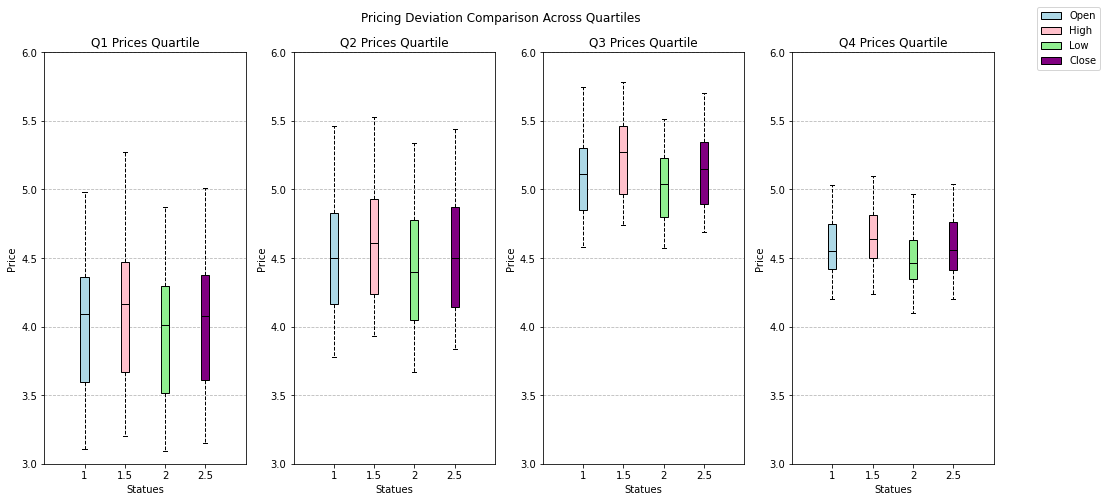

In [64]:
## Creating subplots settings
fig, axs = plt.subplots(1, 4, figsize=(14, 7))

## Create plot for all quartile 
for i, quartile in enumerate(['Q1', 'Q2', 'Q3', 'Q4']):
    
    # Get the current axis position 
    ax = axs[i]
    
    quartile_data = df[df['Quartile'] == quartile]  


    # Creating boxplots for each category
    open = ax.boxplot(quartile_data['Open'], vert=True, widths=0.1, patch_artist=True, positions=[1],
               boxprops=dict(facecolor='lightblue', color='black'),
               medianprops=dict(color='black'),
               whiskerprops=dict(color='black', linestyle='--'),
               capprops=dict(color='black'))

    high = ax.boxplot(quartile_data['High'], vert=True, widths=0.1, patch_artist=True, positions=[1.5],
               boxprops=dict(facecolor='pink', color='black'),
               medianprops=dict(color='black'),
               whiskerprops=dict(color='black', linestyle='--'),
               capprops=dict(color='black'))      

    low = ax.boxplot(quartile_data['Low'], vert=True, widths=0.1, patch_artist=True, positions=[2],
               boxprops=dict(facecolor='lightgreen', color='black'),
               medianprops=dict(color='black'),
               whiskerprops=dict(color='black', linestyle='--'),
               capprops=dict(color='black'))    

    close = ax.boxplot(quartile_data['Close'], vert=True, widths=0.1, patch_artist=True, positions=[2.5],
               boxprops=dict(facecolor='purple', color='black'),
               medianprops=dict(color='black'),
               whiskerprops=dict(color='black', linestyle='--'),
               capprops=dict(color='black'))    

   
    # zoom into the plot
    ax.set_ylim(3, 6)
    ax.set_xlim(0.5, 3)
    # Adding grid
    ax.grid(True, axis='y', linestyle='--', alpha=0.9)
    # Adding labels and title for each subplot
    ax.set_xlabel('Statues')
    ax.set_ylabel('Price')
    ax.set_title(f'{quartile} Prices Quartile')
    

# Adding legend 
fig.legend([open["boxes"][0], high["boxes"][0], low["boxes"][0], close["boxes"][0]], ['Open', 'High', 'Low', 'Close'], bbox_to_anchor=(1.1,1), loc='upper right')


# Title and show plot 
fig.suptitle("Pricing Deviation Comparison Across Quartiles")
plt.tight_layout()
plt.show()



## insight 

In the image above, it compares the standard devision of each quarter. The analysis reveals the following key points:

1. In "AEF Share Prices Trend from 2023 - 2024," there was a spike and decline towards the end of Q1 and the beginning of Q2. However, the median price of Q2 is higher than Q1 and similar to Q4, around 4.5.
2. Q1 (with a volume of 10689164) and Q2 (with a volume of 9038441) had a higher valuation compared to Q3 (with a volume of 6315583) and Q4 (with a volume of 6313821). Additionally, the price of Q4 is the most steady compared to all. This indicates a correlation between fluctuations and trading volume, where higher volume results in larger standard deviation.
3. The average price of Q1 was the lowest, and Q3 performed the best among the quarters.
4. The pattern among these quarters is such that the closing prices are always higher than the low prices, forming a Z shape.

**Insights:**
- To optimise return based on this chart, it would be ideal to buy in Q1 and sell in Q3. Obtaining more sample data can confirm if there is a similar pattern exists in the past would provide more confidence for this strategy.
- There are more opportunities between Q1 and Q2 due to the high fluctuation.

**Key Takeaway:**
- It would be beneficial to gather more samples to ascertain if there is a consistent pattern between each quarter.

Please note that the above information is provided for personal discovery and is not intended as financial advice.